In [1]:
# Notice: For visualization of map, you need basemap package.
# if you dont have basemap install on your machine, you can use the following line to install it
###!conda install -c conda-forge  basemap matplotlib==3.1 -y
# Notice: you maight have to refresh your page and re-run the notebook after installation

# Start by importing libraries

In [2]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

C:\Users\jacob\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


# Import data

In [3]:
import csv
import pandas as pd
import numpy as np

#filename = "corpusTop50words.csv"
filename = "Poe_NotPoe_50words.csv"


#Read csv
pdf = pd.read_csv(filename, index_col=0)
"""pdf = pdf.rename(index={0: 'Total', 1: 'Average',
2: 'Ainsworth_Rookwood1',
3: 'Ainsworth_Rookwood2',
4: 'Ainsworth_Rookwood3',
5: 'Badcock_RealLifeInLondon_1',
6: 'Badcock_RealLifeInLondon_2',
7: 'Bird_Calavar',
8: 'Bird_NickOfTheWoods_1837',
9: 'Bird_SheppardLee1',
10: 'Bird_SheppardLee2',
11: 'Bird_TheInfidel_v1_1835',
12: 'Bowring_MinorMorals1',
13: 'Bowring_MinorMorals2',
14: 'Bowring_MinorMorals3',
15: 'BrownCharlesBrockden_ArthurMervyn_1793',
16: 'BrownCharlesBrockden_EdgarHuntley',
17: 'BrownCharlesBrockden_Ormond_1799',
18: 'BrownCharlesBrockden_Wieland',
19: 'Cooper_LastMohicans_1',
20: 'Cooper_LastMohicans_2',
21: 'Cooper_LastMohicans_3',
22: 'Cooper_LastMohicans_4',
23: 'Cooper_Monikins',
24: 'Cooper_PocketHandkerchief',
25: 'Cooper_TheBravo1',
26: 'Cooper_TheBravo2',
27: 'Edgeworth_HarryandLucy1',
28: 'Edgeworth_HarryandLucy2',
29: 'Edgeworth_HarryandLucy3',
30: 'Edgeworth_HarryandLucy4',
31: 'Edgeworth_Helen',
32: 'Ferrier_Destiny1',
33: 'Ferrier_Destiny2',
34: 'Ferrier_Destiny3',
35: 'Galt_Spaewife1',
36: 'Galt_Spaewife2',
37: 'Galt_Spaewife3',
38: 'Gilman_RecollectionsofSouthernMatron_1',
39: 'Gilman_RecollectionsofSouthernMatron_2',
40: 'Godwin_StLeon_1',
41: 'Godwin_StLeon_2',
42: 'Hawthorne_BlithedaleRomance',
43: 'Hawthorne_MossesFromAnOldManse',
44: 'Hawthorne_ScarletLetter',
45: 'Hawthorne_TwiceToldTales',
46: 'Irving_BracebridgeHall',
47: 'Irving_HistOfNY',
48: 'Irving_RipVanWInkle',
49: 'Irving_SketchBookOfGeoffreyCrayon',
50: 'Landor_PericlesAndAspesia1',
51: 'Landor_PericlesAndAspesia2',
52: 'Lippard_BelOfPrairieEden',
53: 'Lippard_QuakerCity',
54: 'Lytton_LastDayOfPompeii1',
55: 'Lytton_LastDayOfPompeii2',
56: 'Lytton_LastDayOfPompeii3',
57: 'Melville_ConfidenceMan',
58: 'Melville_MobyDick',
59: 'Melville_Omoo_1847',
60: 'Melville_PiazzaTales',
61: 'Poe_Assignation_1834',
62: 'Poe_Berenice_1835',
63: 'Poe_CaskOfAmontillado_1846',
64: 'Poe_FactsOfTheCaseOfMValdemar_1845',
65: 'Poe_FallOfHouseUsher_1839',
66: 'Poe_HopFrog_1849',
67: 'Poe_KingPest_1835',
68: 'Poe_Ligeia_1838',
69: 'Poe_MaskOfTheRedDeath_1842',
70: 'Poe_Metzengerstein_1832',
71: 'Poe_Morella_1835',
72: 'Poe_ShadowAParable_1835',
73: 'Poe_TheManOfTheCrowd_1840',
74: 'Poe_TheMesmericRevelation_1844',
75: 'Poe_TheOvalPortrait_1842',
76: 'Poe_TheSphinx_1846',
77: 'Quincey_EnglishMailCoach_1849',
78: 'Quincey_Klosterheim',
79: 'Quincey_NotebookEnglishOpiumEater',
80: 'Quincey_TheCaesars_1851',
81: 'Scott_ChroniclesOftheCanongate',
82: 'Scott_TheAbbot',
83: 'Scott_ThePirate_1822',
84: 'Scott_Woodstock',
85: 'Southey_TheDoctor1',
86: 'Southey_TheDoctor2',
87: 'UNKNOWN_ADream_1831',
})
pdf = pdf.iloc[: , 1:]
"""
pdf = pdf.drop(["Total","Average"])
#pdf.set_index = pdf['Unnamed: 0']
#pdf = pdf.reset_index(drop=True, inplace=True)



#pdf = pdf.iloc[: , 1:]

#pdf = pdf.drop(columns=4)
#pdf = pdf.drop(columns=[2,3])
#pdf = pdf.rename(columns={0: "s_length", 1: "s_width", 2: "p_length", 3: "p_width"})
#pdf = pdf.reset_index(drop=True)

#pdf.shape

#X = StandardScaler().fit_transform(pdf)
X = pdf.to_numpy()

y = 2
pdf


,all,an,and,as,at,be,been,but,by,for,...,there,these,to,upon,was,were,when,which,who,with
NotPoe,0.0144,0.0141,0.1180,0.0404,0.0232,0.0227,0.0140,0.0249,0.0208,0.0280,...,0.0103,0.0032,0.0947,0.0182,0.0574,0.0162,0.0080,0.0166,0.0095,0.0380
NotPoe,0.0195,0.0122,0.1077,0.0386,0.0225,0.0321,0.0081,0.0192,0.0224,0.0281,...,0.0096,0.0041,0.0957,0.0191,0.0487,0.0179,0.0065,0.0203,0.0122,0.0437
NotPoe,0.0171,0.0099,0.1011,0.0349,0.0266,0.0252,0.0084,0.0309,0.0211,0.0288,...,0.0078,0.0027,0.1020,0.0212,0.0522,0.0127,0.0080,0.0219,0.0099,0.0414
NotPoe,0.0187,0.0179,0.1417,0.0293,0.0289,0.0282,0.0096,0.0201,0.0303,0.0339,...,0.0092,0.0053,0.1146,0.0112,0.0392,0.0137,0.0066,0.0246,0.0181,0.0366
NotPoe,0.0168,0.0172,0.1468,0.0295,0.0278,0.0235,0.0101,0.0182,0.0319,0.0346,...,0.0084,0.0057,0.1128,0.0081,0.0359,0.0144,0.0074,0.0254,0.0162,0.0381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NotPoe_ThePirate_1822,0.0126,0.0128,0.1312,0.0411,0.0218,0.0233,0.0097,0.0253,0.0254,0.0328,...,0.0093,0.0067,0.1096,0.0095,0.0381,0.0143,0.0107,0.0367,0.0142,0.0383
NotPoe_Woodstock,0.0109,0.0114,0.1247,0.0440,0.0206,0.0259,0.0110,0.0268,0.0215,0.0309,...,0.0088,0.0060,0.1094,0.0065,0.0346,0.0124,0.0107,0.0314,0.0163,0.0357
NotPoe_TheDoctor1,0.0178,0.0110,0.1334,0.0363,0.0166,0.0334,0.0132,0.0202,0.0202,0.0393,...,0.0120,0.0054,0.0863,0.0145,0.0354,0.0152,0.0113,0.0358,0.0143,0.0303
NotPoe_TheDoctor2,0.0109,0.0125,0.1216,0.0356,0.0184,0.0282,0.0167,0.0213,0.0198,0.0336,...,0.0142,0.0040,0.0939,0.0160,0.0440,0.0138,0.0127,0.0354,0.0172,0.0272


# Modeling - generating variables

In [4]:
# create random seed
np.random.seed(0)

# Model Clusters

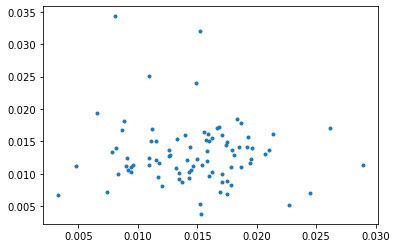

In [5]:
plt.scatter(X[:, 0], X[:, 1], marker='.')

# Data Visualization

In [6]:
numberOfClusters = 2 # USER SET

k_means = KMeans(init = "k-means++", n_clusters = numberOfClusters, n_init = 12)
k_means.fit(X)
k_means_labels = k_means.labels_
#k_means_labels
k_means_cluster_centers = k_means.cluster_centers_
#k_means_cluster_centers

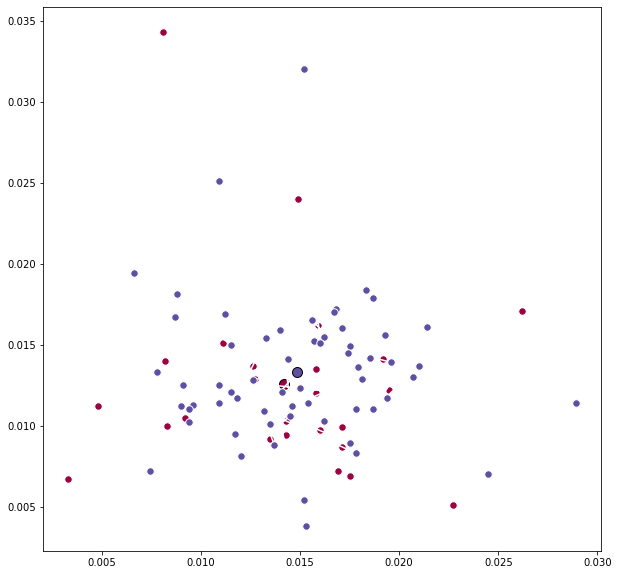

In [9]:
k_means3 = KMeans(init = "k-means++", n_clusters = numberOfClusters, n_init = 40)
k_means3.fit(X)
fig = plt.figure(figsize=(10, 10))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means3.labels_))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len(k_means3.cluster_centers_)), colors):
    my_members = (k_means3.labels_ == k)
    cluster_center = k_means3.cluster_centers_[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.', markersize=15)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=10)
ax.plot()y[]
plt.show()


# label data points